In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Retrieve pickled file from notebook 1
turnstiles_block = pd.read_pickle('turnstiles_block.pkl')

In [3]:
# Calculate the average number of entries and exits per 4 hour time period for each station.
station_mean = turnstiles_block.groupby(["STATION", "BIN_HOUR"])[['4HR_ENTRIES','4HR_EXITS']].mean().reset_index()
station_mean.head(50)

,STATION,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
0,1 AV,00:00 - 4:00,34.098901,31.057692
1,1 AV,04:00 - 08:00,92.926614,183.808639
2,1 AV,08:00 - 12:00,317.836921,359.272336
3,1 AV,12:00 - 16:00,331.963736,325.975824
4,1 AV,16:00 - 20:00,444.689362,488.410638
5,1 AV,20:00 - 24:00,211.456354,209.295028
6,103 ST,00:00 - 4:00,11.457143,24.413312
7,103 ST,04:00 - 08:00,320.986599,160.990747
8,103 ST,08:00 - 12:00,382.349715,208.068732
9,103 ST,12:00 - 16:00,421.085694,280.476275


In [4]:
# Create df for only Bronx stations
    
bronx_station_mean = station_mean[((station_mean["STATION"] == 'V.CORTLANDT PK')
                                   |(station_mean["STATION"] == '238 ST')
                                   |(station_mean["STATION"] == '231 ST')
                                   |(station_mean["STATION"] == 'MARBLE HILL-225')
                                   |(station_mean["STATION"] == 'WOODLAWN')
                                   |(station_mean["STATION"] == 'MOSHOLU PKWY')
                                   |(station_mean["STATION"] == 'KINGSBRIDGE RD')
                                   |(station_mean["STATION"] == 'BEDFORD PK BLVD')
                                   |(station_mean["STATION"] == 'FORDHAM RD')
                                   |(station_mean["STATION"] == '183 ST')
                                   |(station_mean["STATION"] == 'BURNSIDE AV')
                                   |(station_mean["STATION"] == '176 ST')
                                   |(station_mean["STATION"] == 'MT EDEN AV')
                                   |(station_mean["STATION"] == '170 ST')
                                   |(station_mean["STATION"] == '167 ST')
                                   |(station_mean["STATION"] == '174-175 STS')
                                   |(station_mean["STATION"] == '182-183 STS')
                                   |(station_mean["STATION"] == 'TREMONT AV')
                                   |(station_mean["STATION"] == "NORWOOD 205 ST")
                                   |(station_mean["STATION"] == 'WAKEFIELD/241')
                                   |(station_mean["STATION"] == 'NEREID AV')
                                   |(station_mean["STATION"] == '233 ST')
                                   |(station_mean["STATION"] == '225 ST')
                                   |(station_mean["STATION"] == '219 ST')
                                   |(station_mean["STATION"] == 'BURKE AV')
                                   |(station_mean["STATION"] == 'ALLERTON AV')
                                   |(station_mean["STATION"] == 'BRONX PARK EAST')
                                   |(station_mean["STATION"] == 'EASTCHSTER/DYRE')
                                   |(station_mean["STATION"] == 'BAYCHESTER AV')
                                   |(station_mean["STATION"] == 'GUN HILL RD')
                                   |(station_mean["STATION"] == 'PELHAM PKWY')
                                   |(station_mean["STATION"] == 'MORRIS PARK')
                                   |(station_mean["STATION"] == 'BRONX PARK EAST')
                                   |(station_mean["STATION"] == 'E 180 ST')
                                   |(station_mean["STATION"] == 'WEST FARMS SQ')
                                   |(station_mean["STATION"] == '174 ST')
                                   |(station_mean["STATION"] == 'FREEMAN ST')
                                   |(station_mean["STATION"] == 'SIMPSON ST')
                                   |(station_mean["STATION"] == 'INTERVALE AV')
                                   |(station_mean["STATION"] == 'PROSPECT AV')
                                   |(station_mean["STATION"] == 'JACKSON AV')
                                   |(station_mean["STATION"] == '3 AV-149 ST')
                                   |(station_mean["STATION"] == 'PELHAM BAY PARK')
                                   |(station_mean["STATION"] == 'BUHRE AV')
                                   |(station_mean["STATION"] == 'MIDDLETOWN RD')
                                   |(station_mean["STATION"] == 'WESTCHESTER SQ')
                                   |(station_mean["STATION"] == 'ZEREGA AV')
                                   |(station_mean["STATION"] == 'CASTLE HILL AV')
                                   |(station_mean["STATION"] == 'PARKCHESTER')
                                   |(station_mean["STATION"] == 'ST LAWRENCE AV')
                                   |(station_mean["STATION"] == 'MORISN AV/SNDVW')
                                   |(station_mean["STATION"] == 'ELDER AV')
                                   |(station_mean["STATION"] == 'WHITLOCK AV')
                                   |(station_mean["STATION"] == 'HUNTS POINT AV')
                                   |(station_mean["STATION"] == 'LONGWOOD AV')
                                   |(station_mean["STATION"] == 'E 149 ST')
                                   |(station_mean["STATION"] == "E 143/ST MARY'S")
                                   |(station_mean["STATION"] == 'CYPRESS AV')
                                   |(station_mean["STATION"] == 'BROOK AV')
                                   |(station_mean["STATION"] == '3 AV 138 ST'))]
                            

In [6]:
overall_mean = bronx_station_mean.groupby(["BIN_HOUR"])[["4HR_ENTRIES","4HR_EXITS"]].mean().reset_index()
overall_mean

,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
0,00:00 - 4:00,18.750503,27.311164
1,04:00 - 08:00,282.427781,65.613203
2,08:00 - 12:00,193.586595,84.486241
3,12:00 - 16:00,194.891775,136.407804
4,16:00 - 20:00,142.680590,186.757194
5,20:00 - 24:00,52.369860,89.451894


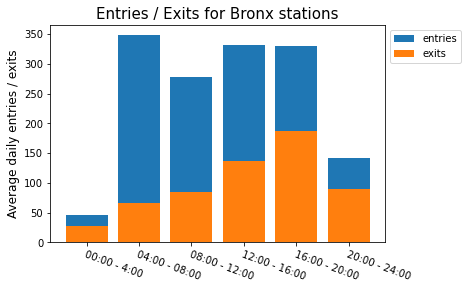

In [7]:
# Plot of overall entries and exits for all Bronx stations

_ = plt.xticks(rotation=25)

x = overall_mean["BIN_HOUR"]
y_entries = overall_mean["4HR_ENTRIES"]
y_exits = overall_mean["4HR_EXITS"]

plt.bar(x,y_entries,label="entries",bottom=y_exits)
plt.bar(x,y_exits,label="exits")

_ = plt.xticks(rotation=-20, ha="left", rotation_mode="anchor")

# plt.xlabel("Time block")
plt.ylabel("Average daily entries / exits",fontsize=12)
plt.title("Entries / Exits for Bronx stations", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("bronx_entries_exits.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1);

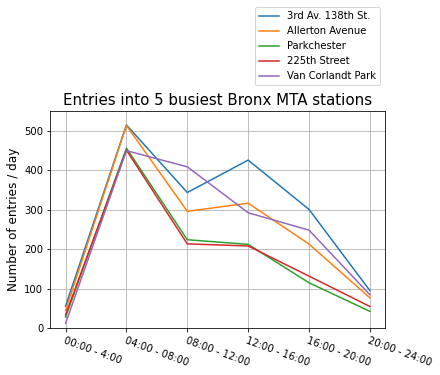

In [8]:
# FINAL plot of the top station entries 4h to 8h

x = station_mean["BIN_HOUR"][0:6]

y_1=station_mean[station_mean["STATION"] == "3 AV 138 ST"]["4HR_ENTRIES"]
y_2=station_mean[station_mean["STATION"] == "ALLERTON AV"]["4HR_ENTRIES"]
y_3=station_mean[station_mean["STATION"] == "PARKCHESTER"]["4HR_ENTRIES"]
y_4=station_mean[station_mean["STATION"] == "225 ST"]["4HR_ENTRIES"]
y_5=station_mean[station_mean["STATION"] == "V.CORTLANDT PK"]["4HR_ENTRIES"]
# y_6=station_mean[station_mean["STATION"] == "BAYCHESTER AV"]["4HR_ENTRIES"]
# y_7=station_mean[station_mean["STATION"] == "BURKE AV"]["4HR_ENTRIES"]
# y_8=station_mean[station_mean["STATION"] == "NEREID AV"]["4HR_ENTRIES"]


plt.plot(x,y_1, label='3rd Av. 138th St.')
plt.plot(x,y_2, label='Allerton Avenue')
plt.plot(x,y_3, label='Parkchester')
plt.plot(x,y_4, label='225th Street')
plt.plot(x,y_5, label='Van Corlandt Park')
# plt.plot(x,y_6, label='Baychester Avenue')
# plt.plot(x,y_7, label='Burke Avenue')
# plt.plot(x,y_8, label='Nereid Avenue')

plt.grid()
_ = plt.xticks(rotation=-20, ha="left", rotation_mode="anchor")
# plt.xlabel("Time block", fontsize=12)
plt.ylabel("Number of entries / day", fontsize=12)
plt.ylim((0,550))
plt.title("Entries into 5 busiest Bronx MTA stations", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1.5))
plt.savefig("entries_top8.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show();

In [9]:
bronx_station_mean[(bronx_station_mean["BIN_HOUR"] == "16:00 - 20:00")].sort_values(by=["4HR_EXITS"],ascending=False)


,STATION,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
1870,PARKCHESTER,16:00 - 20:00,115.282051,442.204212
2206,WESTCHESTER SQ,16:00 - 20:00,394.948718,442.181319
142,167 ST,16:00 - 20:00,240.960460,352.301802
1228,E 180 ST,16:00 - 20:00,145.450185,339.221402
328,3 AV 138 ST,16:00 - 20:00,300.765110,333.054945
1414,GUN HILL RD,16:00 - 20:00,146.752212,327.221792
1054,CASTLE HILL AV,16:00 - 20:00,114.591052,311.224490
1024,BURNSIDE AV,16:00 - 20:00,330.708426,310.919069
1258,ELDER AV,16:00 - 20:00,100.513736,297.569597
1696,MORISN AV/SNDVW,16:00 - 20:00,122.300366,283.702381


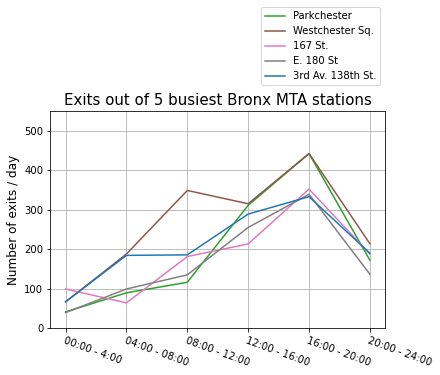

In [10]:
# FINAL Plot of the stations with the most exits between 16h and 20h

x = station_mean["BIN_HOUR"][0:6]

y_1=station_mean[station_mean["STATION"] == "PARKCHESTER"]["4HR_EXITS"]
y_2=station_mean[station_mean["STATION"] == "WESTCHESTER SQ"]["4HR_EXITS"]
y_3=station_mean[station_mean["STATION"] == "167 ST"]["4HR_EXITS"]
y_4=station_mean[station_mean["STATION"] == "E 180 ST"]["4HR_EXITS"]
y_5=station_mean[station_mean["STATION"] == "3 AV 138 ST"]["4HR_EXITS"]
# y_6=station_mean[station_mean["STATION"] == "GUN HILL RD"]["4HR_EXITS"]
# y_7=station_mean[station_mean["STATION"] == "CASTLE HILL AV"]["4HR_EXITS"]
# y_8=station_mean[station_mean["STATION"] == "ELDER AV"]["4HR_EXITS"]


plt.plot(x,y_1, label='Parkchester', color="tab:green")
plt.plot(x,y_2, label='Westchester Sq.', color="tab:brown")
plt.plot(x,y_3, label='167 St.', color="tab:pink")
plt.plot(x,y_4, label='E. 180 St', color="tab:grey")
plt.plot(x,y_5, label='3rd Av. 138th St.', color="tab:blue")
# plt.plot(x,y_6, label='Gun Hill Rd.', color="tab:cyan")
# plt.plot(x,y_7, label='Castle Hill Ave.')
# plt.plot(x,y_8, label='Elder Ave.')

plt.grid()
_ = plt.xticks(rotation=-20, ha="left", rotation_mode="anchor")
# plt.xlabel("Time block", fontsize=12)
plt.ylabel("Number of exits / day", fontsize=12)
plt.ylim((0,550))
plt.title("Exits out of 5 busiest Bronx MTA stations", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1.5))
plt.savefig("exits_top8.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show();

In [11]:
Parkchester = station_mean[station_mean["STATION"] == "PARKCHESTER"]
Parkchester

,STATION,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
1866,PARKCHESTER,00:00 - 4:00,28.587454,41.590659
1867,PARKCHESTER,04:00 - 08:00,455.901070,89.877897
1868,PARKCHESTER,08:00 - 12:00,224.173497,116.567851
1869,PARKCHESTER,12:00 - 16:00,212.516849,311.082423
1870,PARKCHESTER,16:00 - 20:00,115.282051,442.204212
1871,PARKCHESTER,20:00 - 24:00,43.019672,172.273068


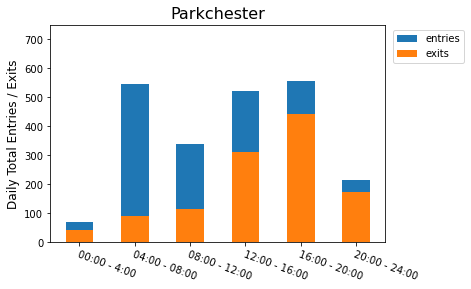

In [12]:
# FINAL Parkchester stacked bar chart with both entries and exits 

labels = Parkchester["BIN_HOUR"][0:6]
entries = Parkchester["4HR_ENTRIES"]
exits = Parkchester["4HR_EXITS"]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, entries, width, label='entries', bottom=exits)
ax.bar(labels, exits, width, label='exits')

ax.set_ylabel('Daily Total Entries / Exits',fontsize=12)
plt.ylim((0,750))
ax.set_title('Parkchester',fontsize=16)
ax.legend(bbox_to_anchor=(1.25, 1))

_ = plt.xticks(rotation=-20, ha="left", rotation_mode="anchor")

plt.savefig("parkchester.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

plt.show();

In [13]:
STATION_3AV_138ST = station_mean[station_mean["STATION"] == "3 AV 138 ST"]
STATION_3AV_138ST

,STATION,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
324,3 AV 138 ST,00:00 - 4:00,56.122759,67.132414
325,3 AV 138 ST,04:00 - 08:00,514.565684,184.646113
326,3 AV 138 ST,08:00 - 12:00,343.570839,185.896836
327,3 AV 138 ST,12:00 - 16:00,425.570055,289.137363
328,3 AV 138 ST,16:00 - 20:00,300.765110,333.054945
329,3 AV 138 ST,20:00 - 24:00,95.490305,190.180055


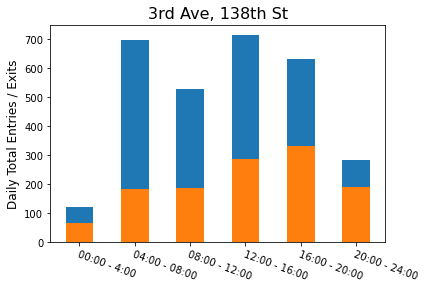

In [14]:
# FINAL 3rd Av stacked bar chart with both entries and exits 

labels = STATION_3AV_138ST["BIN_HOUR"][0:6]
entries = STATION_3AV_138ST["4HR_ENTRIES"]
exits = STATION_3AV_138ST["4HR_EXITS"]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, entries, width, label='entries', bottom=exits)
ax.bar(labels, exits, width, label='exits')

ax.set_ylabel('Daily Total Entries / Exits',fontsize=12)
plt.ylim((0,750))

ax.set_title('3rd Ave, 138th St',fontsize=16)
# ax.legend(bbox_to_anchor=(1, 1))

_ = plt.xticks(rotation=-20, ha="left", rotation_mode="anchor")


plt.savefig("3av138st.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

plt.show();

In [15]:
bronx_station_mean.head(10)

,STATION,BIN_HOUR,4HR_ENTRIES,4HR_EXITS
138,167 ST,00:00 - 4:00,22.624498,99.648594
139,167 ST,04:00 - 08:00,341.003390,64.414528
140,167 ST,08:00 - 12:00,366.775811,181.573255
141,167 ST,12:00 - 16:00,291.151500,213.551500
142,167 ST,16:00 - 20:00,240.960460,352.301802
143,167 ST,20:00 - 24:00,100.555500,187.707182
156,170 ST,00:00 - 4:00,16.615234,31.055359
157,170 ST,04:00 - 08:00,262.580806,54.978887
158,170 ST,08:00 - 12:00,205.763138,107.362056
159,170 ST,12:00 - 16:00,200.479126,160.360905


In [16]:
# Rank stations by highest total number of daily entries
bronx_daily_entries = bronx_station_mean.groupby(["STATION"])[["4HR_ENTRIES"]].sum().reset_index()
bronx_daily_entries.sort_values(["4HR_ENTRIES"],ascending=False)

,STATION,4HR_ENTRIES
12,3 AV 138 ST,1736.084751
21,BURNSIDE AV,1671.228765
55,WESTCHESTER SQ,1666.646186
52,V.CORTLANDT PK,1496.560280
14,ALLERTON AV,1461.314645
5,182-183 STS,1365.151203
0,167 ST,1363.071159
13,3 AV-149 ST,1231.716286
6,183 ST,1221.904737
57,WOODLAWN,1212.952793


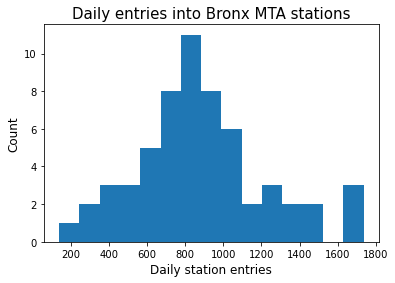

In [17]:
# Histogram with average daily entries into each Bronx MTA station
n_bins = 15

x = bronx_daily_entries["4HR_ENTRIES"]

plt.hist(x, bins=n_bins)

plt.xlabel("Daily station entries", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Daily entries into Bronx MTA stations", fontsize=15)
plt.savefig("entries_histo.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show();


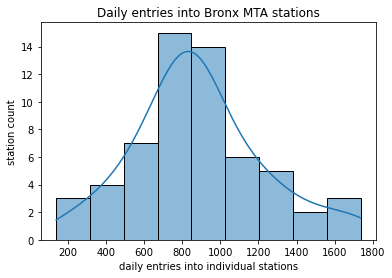

In [18]:
# Seaborn histogram

import seaborn as sns

x_vals = bronx_daily_entries["4HR_ENTRIES"]

ax = sns.histplot(data=None, x=x_vals, stat='count', bins='auto', cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=True, thresh=0, cbar=False, legend=True);
ax.set(xlabel='daily entries into individual stations', ylabel='station count')
ax.set(title='Daily entries into Bronx MTA stations')

# n_bins = 15

plt.savefig("new_histo", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1);